# Pacological, LIF experiments

* All experiments here should be controlled and (re)run from the `Makefile` at the top of the pacological directory. This notebook is for plotting and analysis only.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [91]:
from pacological.lif import gain
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed
from pacological.lif import exp, gain
from convenience.numpy import save_hdfz, load_hdfz


def plot_fi(rates, Is, gs, vs, xfactors):
    n_plot = 3

    plt.figure(figsize=(4,12))
    plt.subplot(n_plot, 1, 1)
    plt.plot(Is, rates[:,0], label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, rates[:,1], label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, rates[:,2], label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, rates[:,3], label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, rates[:,4], label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("Firing rate (Hz)")


    plt.subplot(n_plot, 1, 2)
    plt.plot(Is, gs[:,0], label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, gs[:,1], label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, gs[:,2], label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, gs[:,3], label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, gs[:,4], label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("g (nanosiemens)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.subplot(n_plot, 1, 3)
    plt.plot(Is, vs[:,0]*1000, label=xfactors[0], color='k', linewidth=2)
    plt.plot(Is, vs[:,1]*1000, label=xfactors[1], color='grey', linewidth=2)
    plt.plot(Is, vs[:,2]*1000, label=xfactors[2], color='green', linewidth=2)
    plt.plot(Is, vs[:,3]*1000, label=xfactors[3], color='blue', linewidth=2)
    plt.plot(Is, vs[:,4]*1000, label=xfactors[4], color='y', linewidth=2)
    plt.xlabel("I (mvolt)")
    plt.ylabel("Vm (mvolt)")

# Sandbox (with two models)

For directly comparing models, _silly goose_.

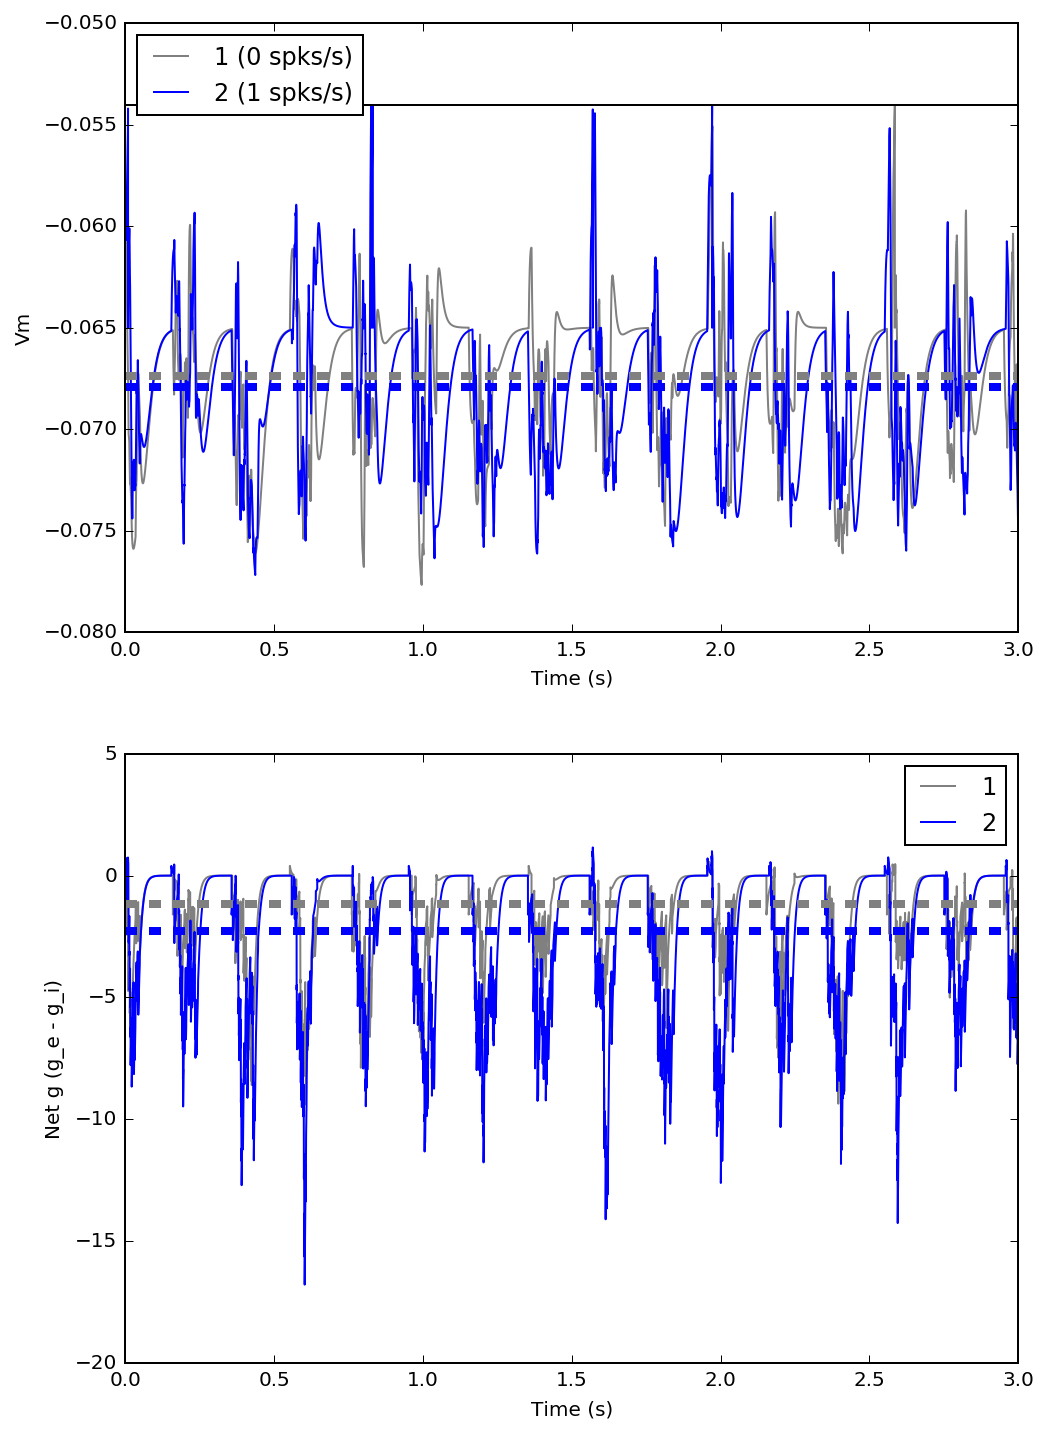

In [141]:
# --
f = 5
I = 0
xfactor1 = 2
xfactor2 = 4

# --
t = 3
res1 = exp(t, I, xfactor1, f=f)
res2 = exp(t, I, xfactor2, f=f)

# --
spikes1 = res1['spikes']
traces1 = res1['traces']
spikes2 = res2['spikes']
traces2 = res2['traces']

tot_g1 = traces1.g_e_[0] - traces1.g_i_[0]
M_v1 = np.mean(traces1.v_[0])
SD_v1 = np.std(traces1.v_[0])
rate1 = spikes1.t_[:].shape[0] / t

tot_g2 = traces2.g_e_[0] - traces2.g_i_[0]
M_v2 = np.mean(traces2.v_[0])
SD_v2 = np.std(traces2.v_[0])
rate2 = spikes2.t_[:].shape[0] / t

# --
n_plot = 2
plt.figure(figsize=(8,12))
plt.subplot(n_plot, 1, 1)
plt.plot(traces1.t_, traces1.v_[0], 'grey', label='1 ({} spks/s)'.format(rate1))
plt.plot(traces2.t_, traces2.v_[0], 'blue', label='2 ({} spks/s)'.format(rate2))
plt.axhline(y=-0.054, color='k')
plt.axhline(y=np.mean(traces1.v_[0]), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(traces2.v_[0]), color='blue', linestyle='--', linewidth=4)
plt.xlabel('Time (s)')
plt.ylabel('Vm')
plt.legend(loc='best')

plt.subplot(n_plot, 1, 2)
plt.plot(traces1.t_, tot_g1, 'grey', label='1')
plt.plot(traces2.t_, tot_g2, 'blue', label='2')
plt.axhline(y=np.mean(tot_g1), color='grey', linestyle='--', linewidth=4)
plt.axhline(y=np.mean(tot_g2), color='blue', linestyle='--', linewidth=4)
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Net g (g_e - g_i)')

# Checking balance

A comparison of balance in g versus vm

In [116]:
# dat = load_hdfz('data/exp206/bal.hdf5')
# rates1 = dat['rates1']
# rates2 = dat['rates2']
# xs = dat['xs']

# # --
# n_plot = 2

# # M
# plt.figure(figsize=(4,8))
# plt.subplot(n_plot, 1, 1)
# plt.plot(Is, rates1[:,0], label='1 ({}X)'.format(xs[0]), color='grey')
# plt.plot(Is, rates1[:,1], label='1 ({}X)'.format(xs[1]), color='g')
# plt.plot(Is, rates1[:,2], label='1 ({}X)'.format(xs[2]), color='b')
# plt.xlabel("I (mvolt)")
# plt.ylabel("Firing rate (Hz)")
# plt.legend(loc='best')

# plt.subplot(n_plot, 1, 2)
# plt.plot(Is, rates2[:,0], label='2 ({}X)'.format(xs[0]), color='grey', linestyle='--')
# plt.plot(Is, rates2[:,1], label='2 ({}X)'.format(xs[1]), color='g', linestyle='--')
# plt.plot(Is, rates2[:,2], label='2 ({}X)'.format(xs[2]), color='b', linestyle='--')
# plt.xlabel("I (mvolt)")
# plt.ylabel("Firing rate (Hz)")
# plt.legend(loc='best')

# Classic version

Now we run several simulations of `I` versus `rate` for `xfactor`s.  Following Reyes et al 2002.

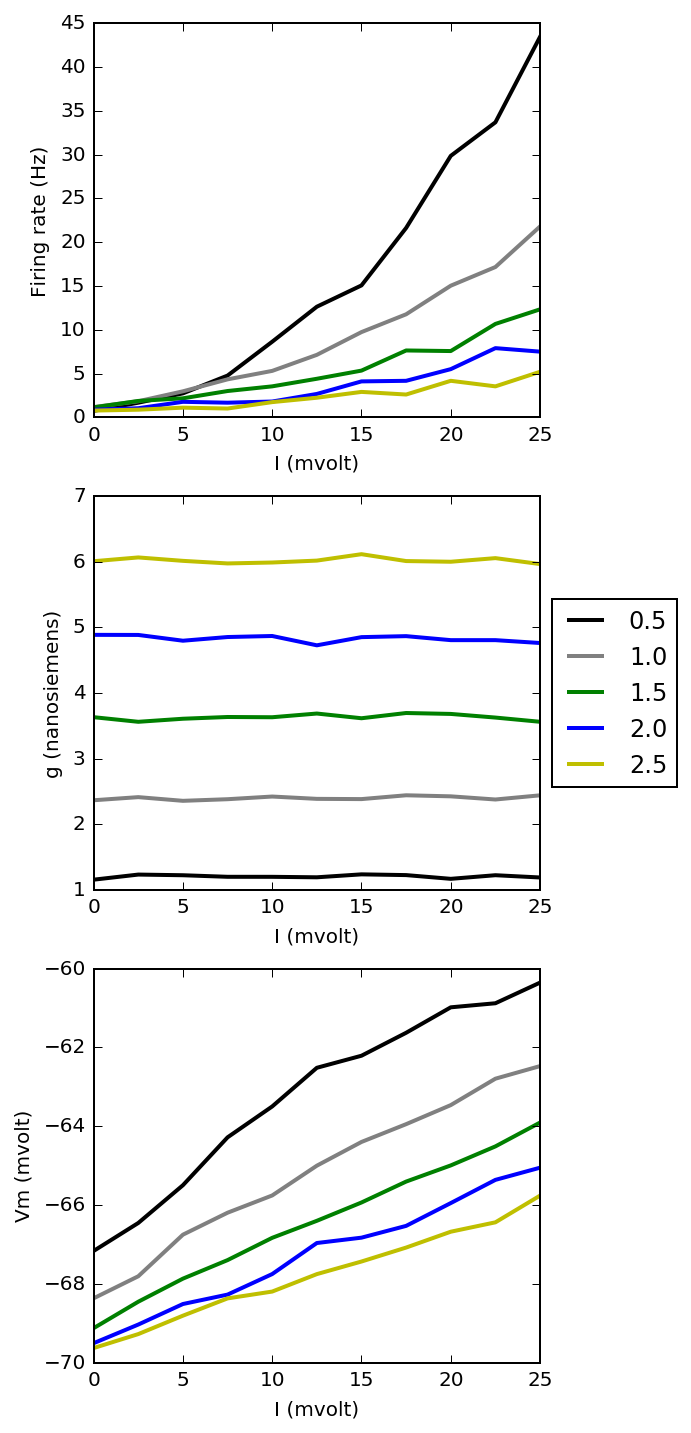

In [92]:
dat = load_hdfz('../data/exp200/classic.hdf5')
rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

# Oscillating version

Using the amplitude of the oscillation to control the gain.

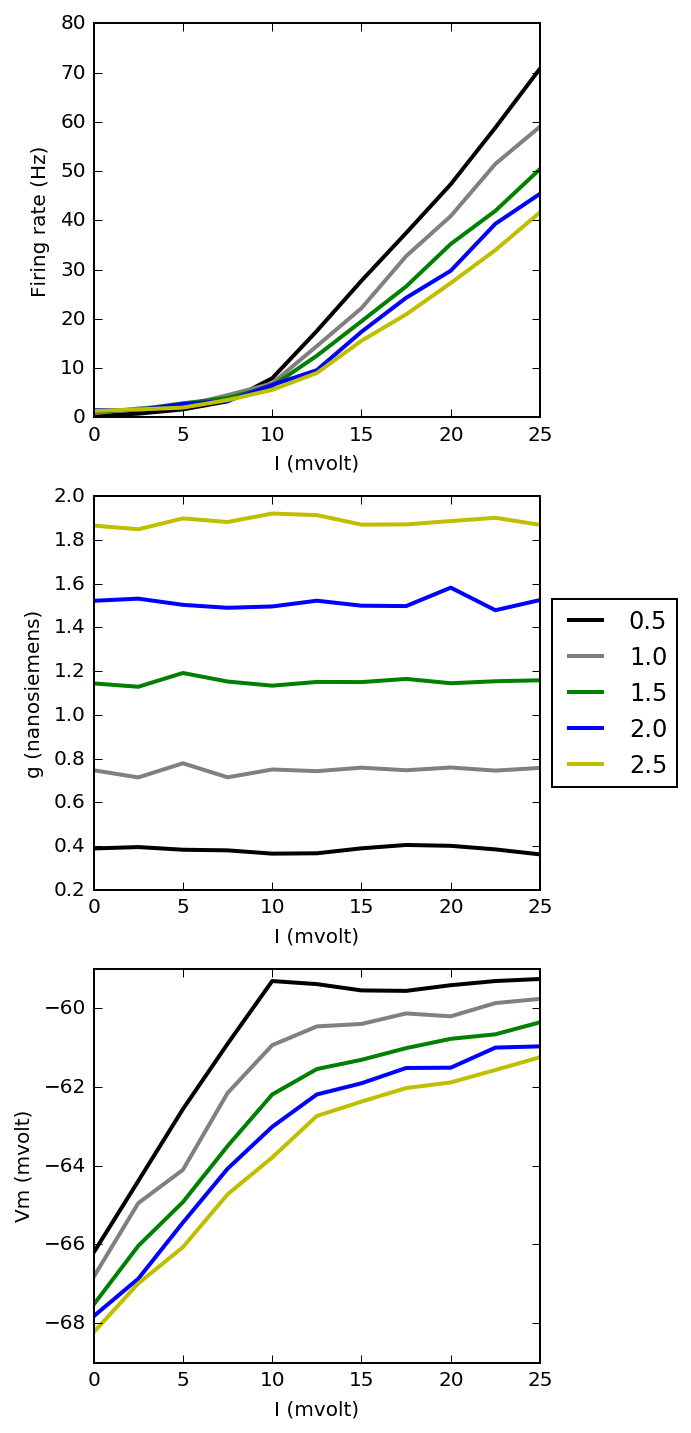

In [93]:
dat = load_hdfz('../data/exp201/osc.hdf5')

rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

* These simulations suggest that the onset of oscillation should about double the gain, assuming the background rate is constant. That is, firing remains of the sparse irregular type, which is what many reports of cortical firing suggest.

# Unbalanced and oscillating

Favor `re` then `ri`

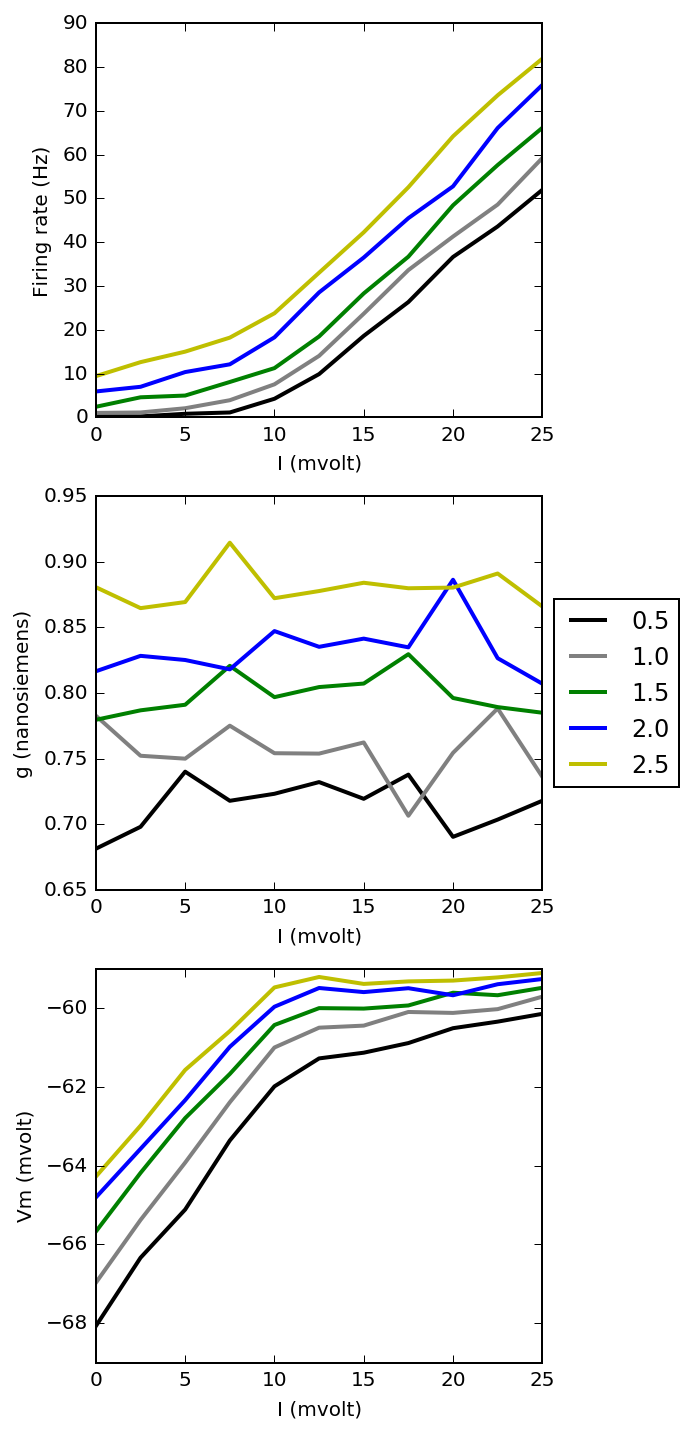

In [94]:
dat = load_hdfz('../data/exp202/re.hdf5')
rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

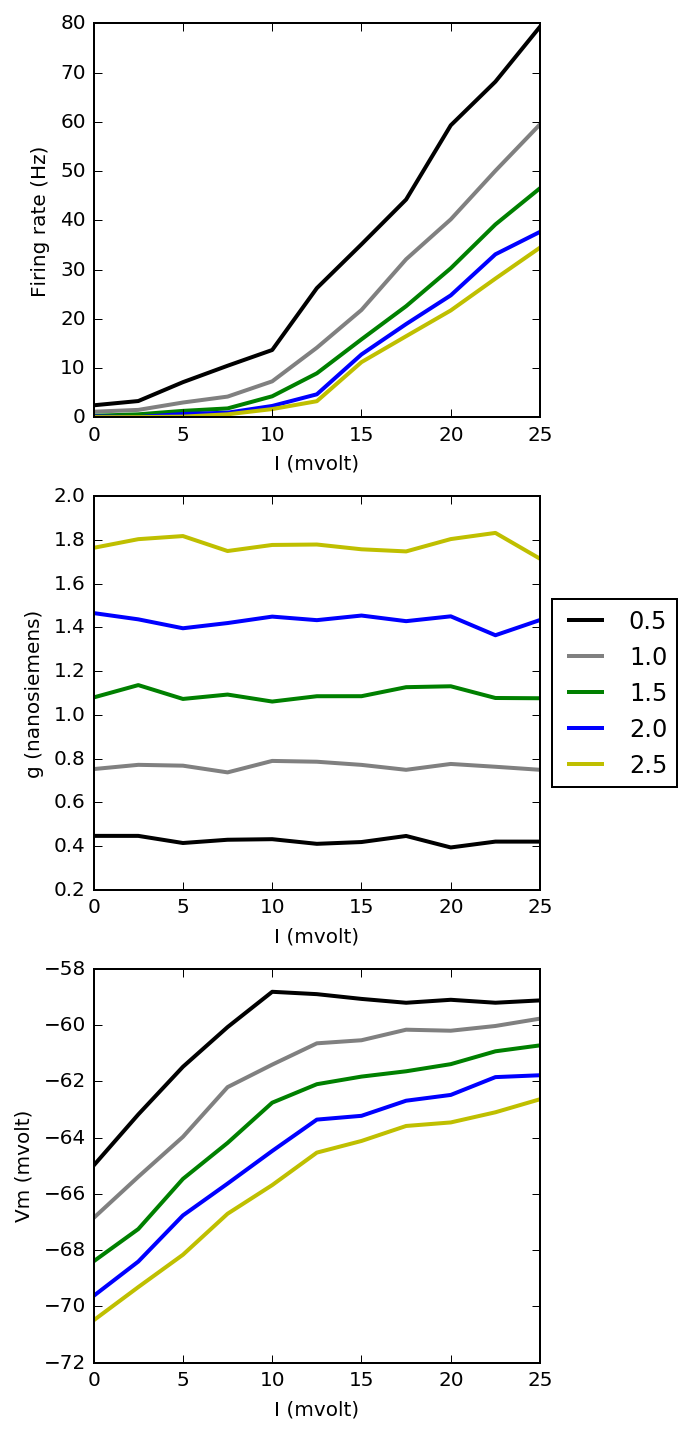

In [95]:
dat = load_hdfz('../data/exp203/ri.hdf5')
rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
xfactors = dat['xfactors']

plot_fi(rates, Is, gs, vs, xfactors)

# Oscillation, gain, and variance

Compare oscillation onset (constant rate) to a halving the rate.

## Single examples

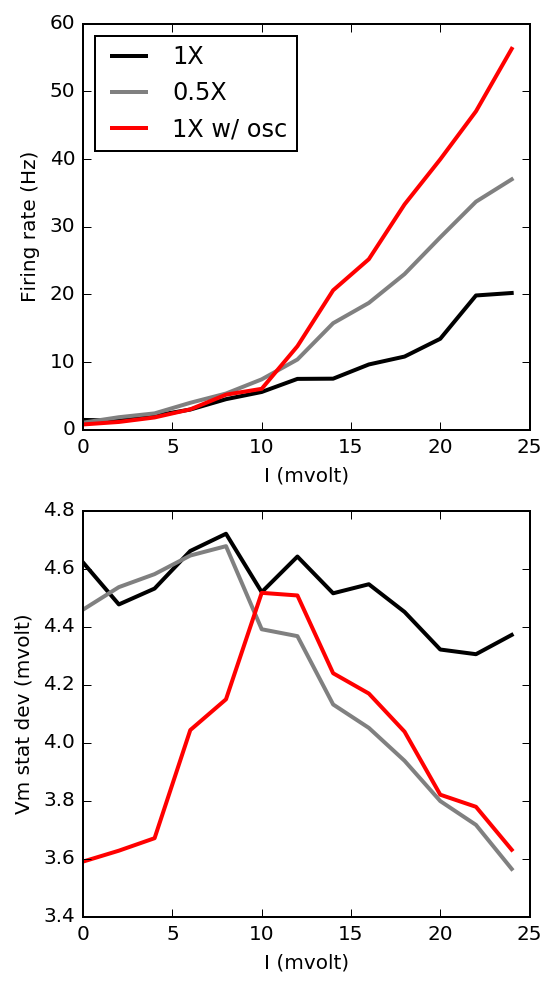

In [9]:
dat = load_hdfz('../data/exp204/versus.hdf5')

rates = dat['rates']
Is = dat['Is']
gs = dat['gs']
vs = dat['vs']
vs_sd = dat['vs_sd']

# --
n_plot = 2

plt.figure(figsize=(4,8))
plt.subplot(n_plot, 1, 1)
plt.plot(Is, rates[:,0], label='1X', color='k', linewidth=2)
plt.plot(Is, rates[:,1], label='0.5X', color='grey', linewidth=2)
plt.plot(Is, rates[:,2], label='1X w/ osc', color='r', linewidth=2)
plt.xlabel("I (mvolt)")
plt.ylabel("Firing rate (Hz)")
plt.legend(loc='best')

plt.subplot(n_plot, 1, 2)
plt.plot(Is, vs_sd[:,0] * 1000, label='1X', color='k', linewidth=2) # in mV
plt.plot(Is, vs_sd[:,1] * 1000, label='0.5X', color='grey', linewidth=2)
plt.plot(Is, vs_sd[:,2] * 1000, label='1X w/ osc', color='r', linewidth=2)
plt.xlabel("I (mvolt)")
plt.ylabel("Vm stat dev (mvolt)")
# plt.legend(loc='best')

* Oscillation increases gain, and increases it by about twice achieved by halving the background rate.
* Is the small crossing of `osc` of `0.5` a small N artifact or real?
* If real do `osc` and `X` scale a (tiny?) bit differently? 
* Or is `osc` no perfect mutliplication? Quantify these.

* Stat dev of `osc` and `0.5` are very similar over the domain where they both increases gain. 
* However oscillatory firing is still Poisson. What if we consider a bursting or more synchronous model for oscillation? 


# The limit of oscillations gain effect.

* Given the increase in gain with oscillation onset (above), the below establishes how large can a oscillation grow over `1X` before the gain increase is lost?

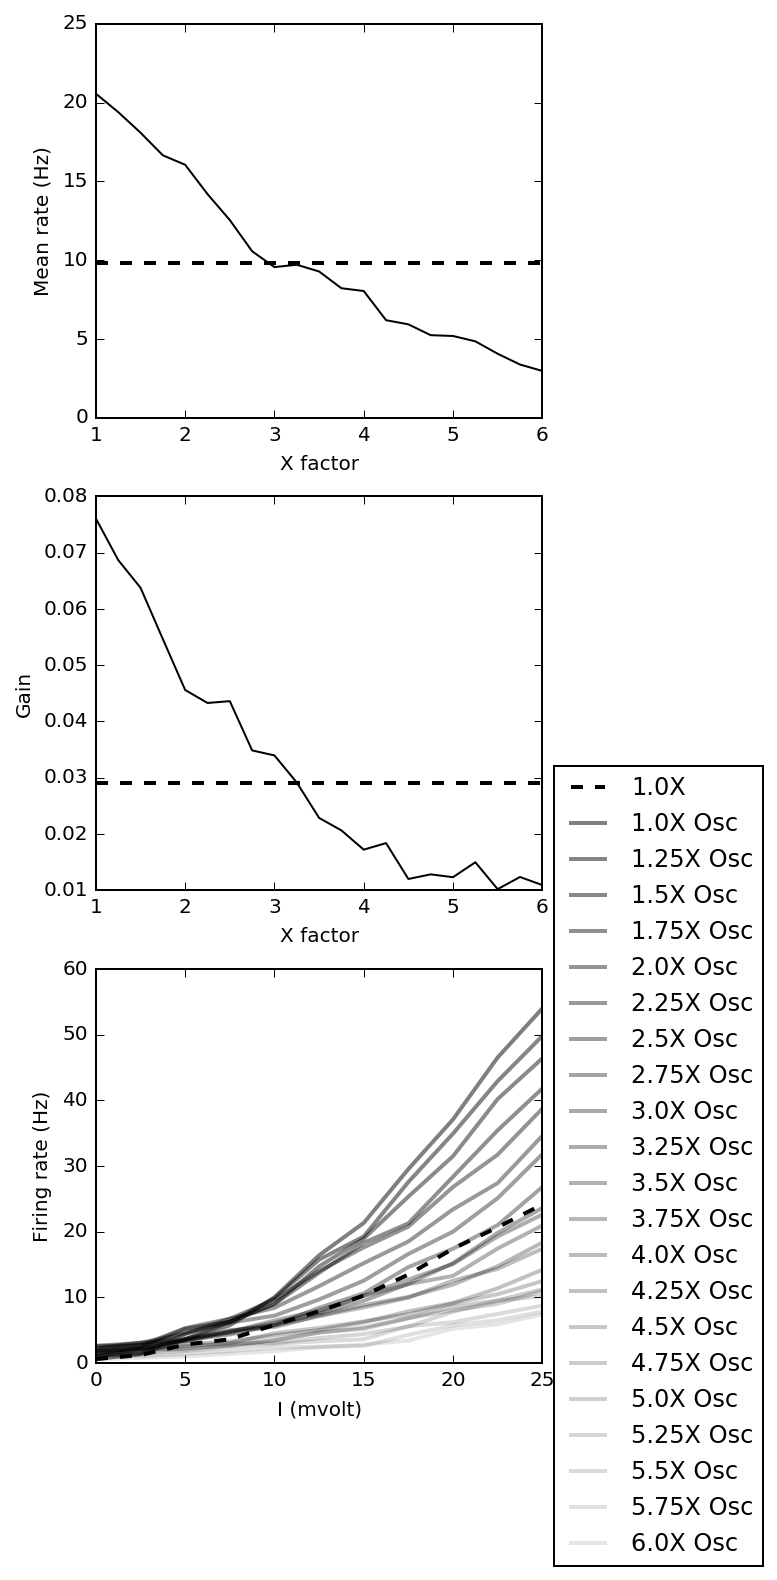

In [114]:
dat = load_hdfz('../data/exp205/limits_51.hdf5')

rates = dat['rates']
Is = dat['Is']
xfactors = dat['xfactors']

# -
n_plot = 3

plt.figure(figsize=(4,12))

# -
plt.subplot(n_plot, 1, 1)
plt.plot(xfactors, rates.mean(0)[1:], color='k')
plt.axhline(y=np.mean(rates[:,0]), color='k', linestyle='--', linewidth=2)
plt.xlabel("X factor")
plt.ylabel("Mean rate (Hz)")

# -
gains = []
for j in range(rates.shape[1]):
    fitted = np.polyfit(Is, rates[:, j], 2)
    gains.append(fitted[0])

plt.subplot(n_plot, 1, 2)
plt.plot(xfactors, gains[1:], color='k')
plt.axhline(y=gains[0], color='k', linestyle='--', linewidth=2)
plt.xlabel("X factor")
plt.ylabel("Gain")

# -
# Too many, but plot anyway
ws = np.linspace(0.5, 0.1, len(xfactors))  # line weights

plt.subplot(n_plot, 1, 3)
plt.plot(Is, rates[:, 0], label='{}X'.format(
        xfactors[0]), color='k', linestyle='--', linewidth=2)
for j, xf in enumerate(xfactors):
    plt.plot(Is, rates[:, j + 1], label='{}X Osc'.format(
            xfactors[j]), color='k', alpha=ws[j], linewidth=2)  # offset j for 1X in 0
plt.xlabel("I (mvolt)")
plt.ylabel("Firing rate (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* The oscillating rate can grow to be over `5X` the constant `1X` rate for the same gain.
* There is a whole 'hidden' (i.e. interesting) space for gain control when oscillation begins.

## Frequency, X, and gain - aggregate results

Ran many more simulations looking at oscillation frequency from 1-60 Hz, in 2 Hz increments. Below is the effect of freqency (x) and xfactor (color) on gain (y). 

- Exp205

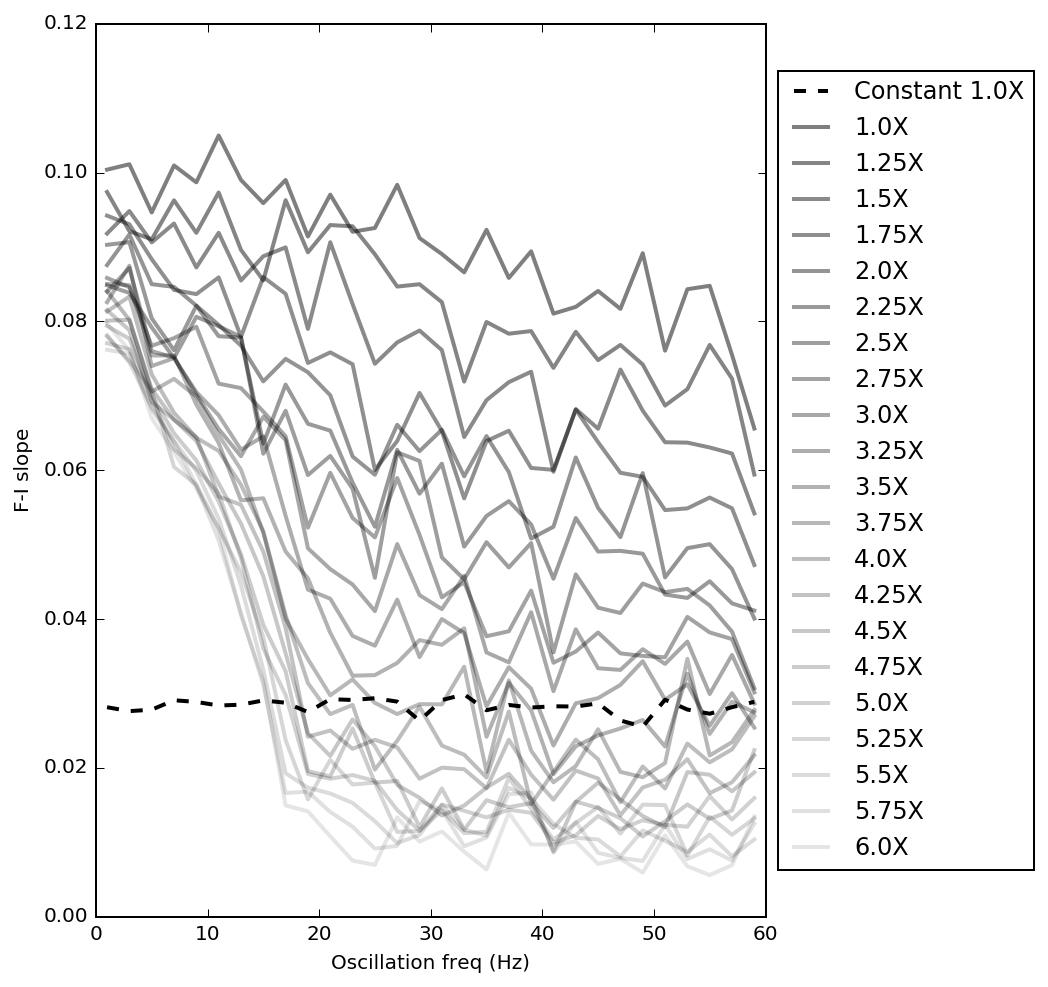

In [112]:
freqs = range(1, 60, 2)
xfactors = np.arange(1, 6.25, .25)

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp205/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 2)
        gains[i, j] = fitted[0]
        
# --
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Sub 20Hz oscillations have a large interaction with `xfactor` (the background rate multiplier) and `f` (oscillation frequency). 
* Slow strong oscillations have an especially steep gain response. 
* Above 20 Hz, `xfactor-f` effects are lessened. A shallow linear decline.
* All oscillations increase gain compared to `Constant 1X`, as long as the background rate is less than about 4-5 X (or 500-625 Hz).

### Low background 

Repeated the previous but looked at 0.1-1X instead. Curios how the gain effect changes (if at all) under very low firing conditions.

- Exp207

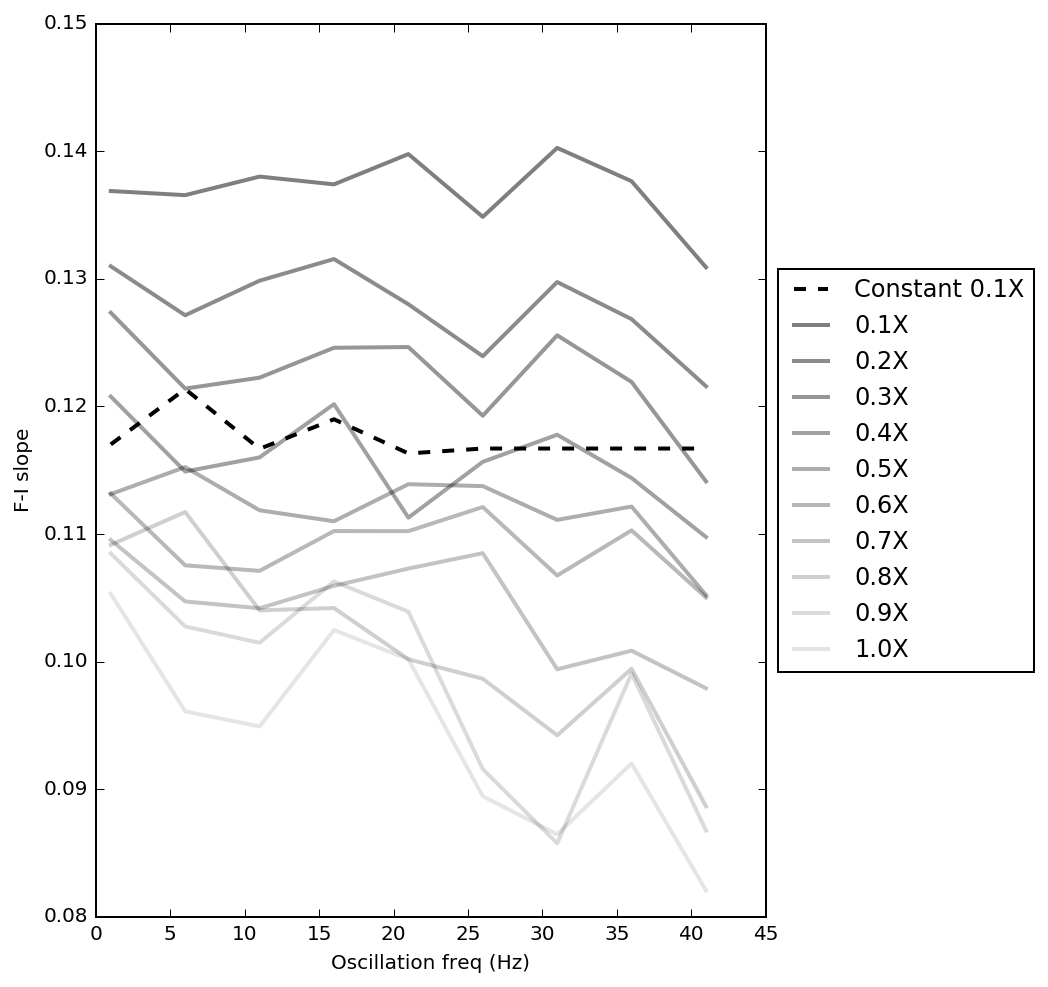

In [120]:
freqs = range(1, 45, 5)
xfactors = np.arange(0.1, 1.1, .1)

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp207/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
        
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 2)
        gains[i, j] = fitted[0]

# --
# Plot
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X factor
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- Low background has very little oscillation related changes; the plots are flat along the x axis.
- though (indepdent of frequency) oscillation itself does offer a gain improvement of about 3 fold.
- There may be a drop coming past 40 Hz, as all the curves drop off there. Need to run it out to 60 or 80 Hz to know.
- Absolute gain value is an order of magnitude larger than for the `1X` series.

### High background

Repeated the previous but looked at 5-9X instead.

* Exp208

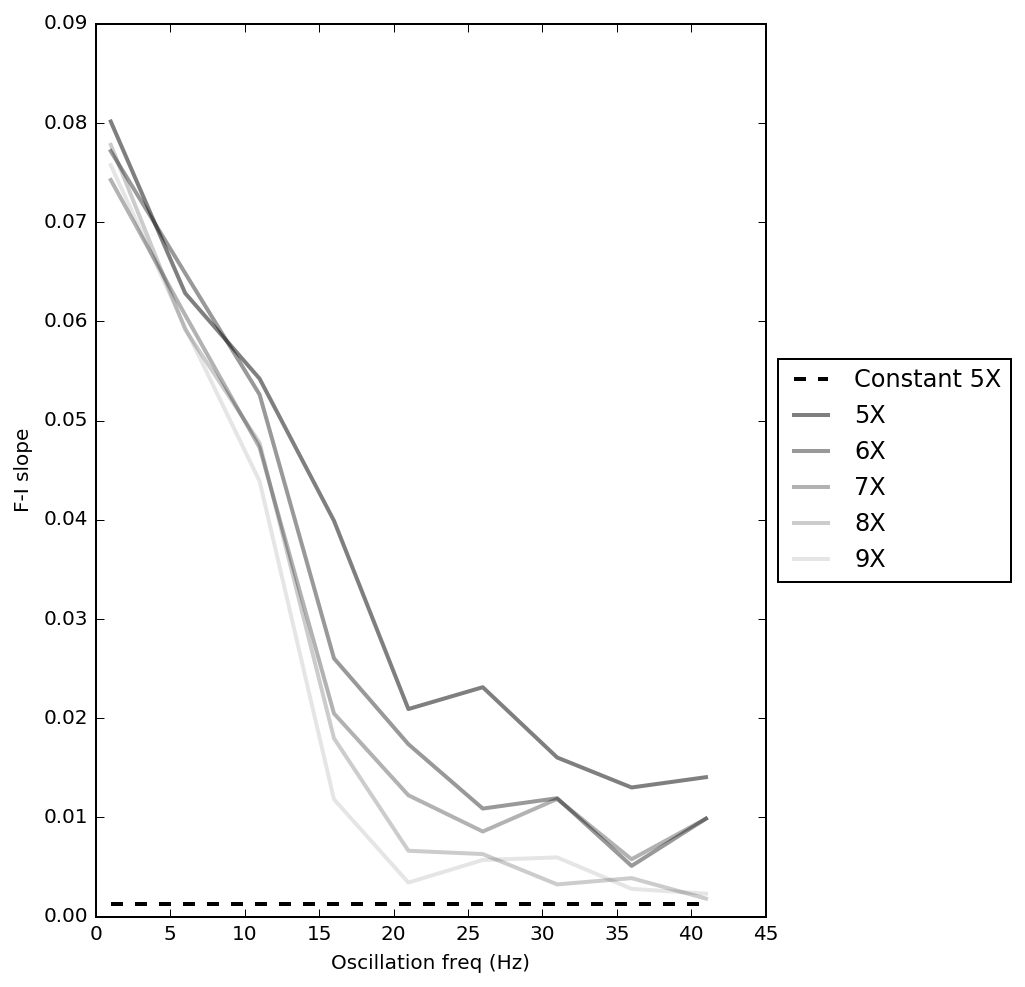

In [126]:
freqs = range(1, 45, 5)
xfactors = np.arange(5, 10, 1)

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp208/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 2)
        gains[i, j] = fitted[0]

# --
# Plot
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X factor
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- At high background (<1000 Hz) the change in F-I steepness around 15-20 Hz is maintained
- Though all oscillations are higher gain that the `5X` baseline.
- The `X` values cluster at the lower oscillation frequencies and only spread out as `f` increases. The spread starts at around 10, before the flattening in F-I at 15-20 Hz.
- Overall gain effect is in the same absolute range as the `1X` series.

### Longer simulation time

Repeat of 205 with `t = 5` seconds of run time per trial.  Short run times (`t = 1`) were not biasing?

- Exp209

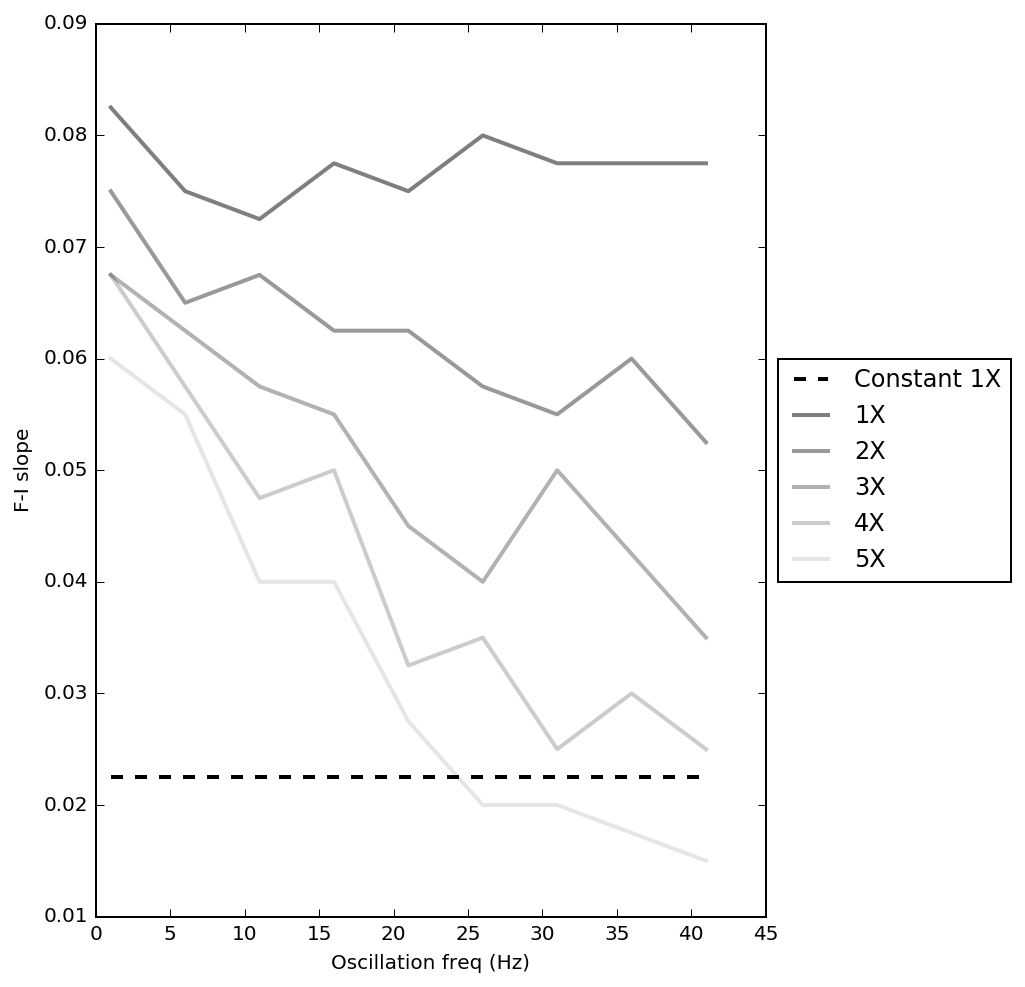

In [142]:
freqs = range(1, 45, 5)
xfactors = np.arange(5, 10, 1)

# Gather gains, for all x and f.
gains = np.zeros((len(freqs), len(xfactors)+1))
for i, f in enumerate(freqs):
    try:
        dat = load_hdfz('../data/exp209/limits_{}.hdf5'.format(f))
    except:
        print("{} not found".format(f))
        continue
    
    rates = dat['rates']
    Is = dat['Is']
    xfactors = dat['xfactors']
    
    for j in range(rates.shape[1]):
        fitted = np.polyfit(Is, rates[:, j], 2)
        gains[i, j] = fitted[0]

# --
# Plot
plt.figure(figsize=(6,8))

# 1X
plt.plot(
    freqs, gains[:, 0], 
    label='Constant {}X'.format(xfactors[0]), 
    color='k', linestyle='--', 
    linewidth=2
)

# All the Xs for oscillation, color by X factor
ws = np.linspace(.5, .1, len(xfactors))  # line weights
for j, xf in enumerate(xfactors):
    plt.plot(
        freqs, gains[:, j + 1], 
        label='{}X'.format(xf), 
        color='k', alpha=ws[j], 
        linewidth=2
    )

plt.xlabel("Oscillation freq (Hz)")
plt.ylabel("F-I slope")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

* Longer times look qualitativily similar to shorter times
* The overall maximum magnitude of oscillation looks to be about 0.02 less for 5 seconds versus 1 (compare this to experiment 205)